# 使用形态学操作对二值图像进行后处理

形态学操作基于形状来转换图像；在这种情况下，我们通常指的是二值图像。

In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage import morphology
from skimage import filters

## 核、足迹和结构元素

如果我们使用scikit-image，许多形态学滤波器都有一个`footprint`参数。这个足迹就是滤波器核，在文献中你也会找到`结构元素`这个术语。

In [2]:
# creates a disk of 1 with radius = 3
disk = morphology.disk(3) 
disk

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

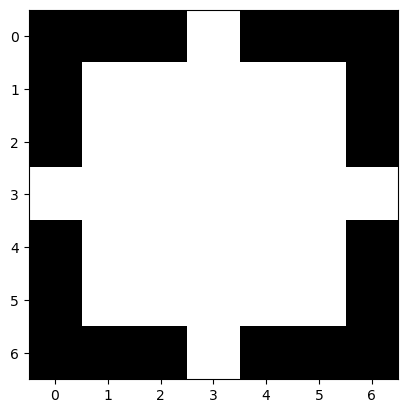

In [3]:
plt.imshow(disk, cmap='gray')

In [4]:
# create a square with width and height = 3
square = morphology.square(3) 
square

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

## 二值形态学

为了演示二值图像的形态学滤波，我们再次使用小的细胞核图像。

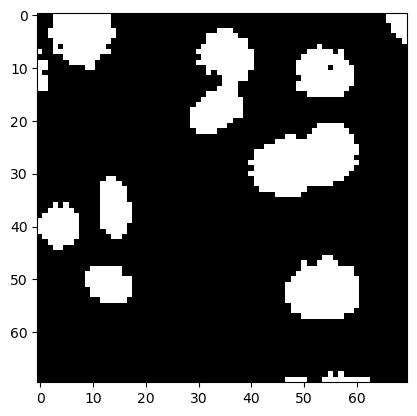

In [5]:
image_nuclei = imread('../../data/mitosis_mod.tif').astype(float)
image_binary = image_nuclei > filters.threshold_otsu(image_nuclei)

plt.imshow(image_binary, cmap='gray')

## 腐蚀和膨胀
要使黑色海洋中的白色岛屿变小，我们需要_腐蚀_它们的海岸线。

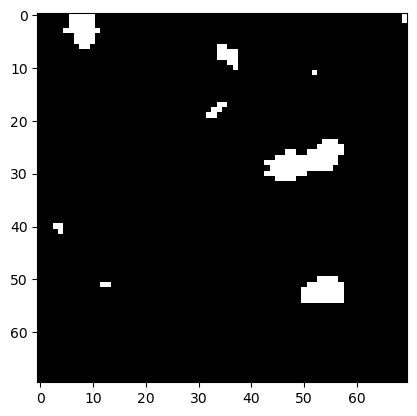

In [6]:
eroded = morphology.binary_erosion(image_binary, disk)

plt.imshow(eroded, cmap='gray')

如果我们之后对图像进行膨胀，我们会得到看起来比原始二值图像更平滑的白色岛屿。

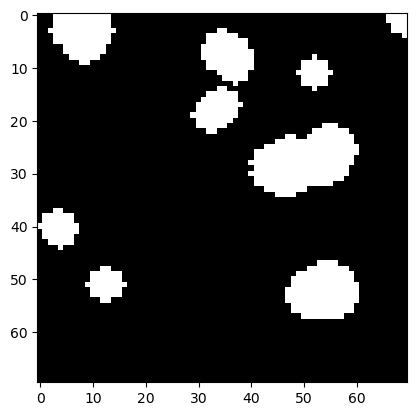

In [7]:
eroded_dilated = morphology.binary_dilation(eroded, disk)

plt.imshow(eroded_dilated, cmap='gray')

连续调用腐蚀和膨胀是如此常见，以至于有一个专门的函数来执行这个操作。由于岛屿之间的间隙_打开_，这个操作被称为_开运算_。

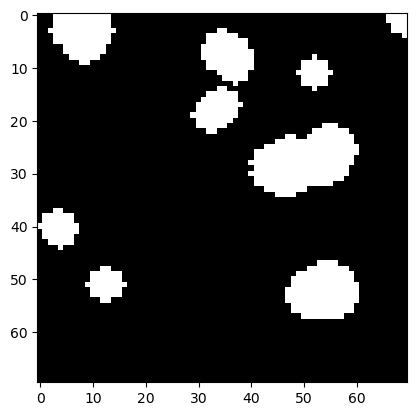

In [8]:
opened = morphology.binary_opening(image_binary, disk)

plt.imshow(opened, cmap='gray')

## 练习1
还有一个_闭运算_操作。将其应用于二值图像。

## 练习2
在[scikit-image文档](https://scikit-image.org/)中搜索最小和最大滤波器。将最小滤波器应用于二值图像，然后将最大滤波器应用于结果。将其与上面显示的图像进行比较。